## 8. 시계열 분석

### 8.1 시계열 분석 개념
+ 일정한 시간 간격으로 표시된 자료의 특성을 파악하여 미래를 예측하는 분석방법
+ 추세 변동 : X(시간)에 따라 y(종속변수) 값이 달라지는 것
+ 계절 변동 : 특정 주기별로 같은 패턴을 보이는 파동의 형태
+ 순환 변동 : 추세 변동 + 계절 변동의 개념, 일정한 주기를 가지고 추세를 따라감
+ 불규칙 변동 : 시간과 종속변수 와의 관계로는 설명할 수 없는 변동
  + ex) 천재지변, 태풍, 홍수 등

시계열 분해는 시계열 자료를 추세(Trend), 계절성(Seansonality), 잔차(Residual)로 분해하는 기법

### 8.2 시계열 분해 방법
1. 데이터를 보고 시계열의 주기적 반복/계절성이 있는지, 가법 모형(additive model, y = t + s + r)과 승법 모형(multiplicative model, y = t * s * r) 중 무엇이 더 적합할지 판단을 합니다.
2. 시계열 자료에서 추세(trend)를 뽑아내기 위해서 중심 이동 평균(centered moving average)을 이용합니다.
3. 원 자료에서 추세 분해값을 빼줍니다(detrend). 그러면 계절 요인과 불규칙 요인만 남게 됩니다.
4. 다음에 계절 주기 (seasonal period) 로 detrend 이후 남은 값의 합을 나누어주면 계절 평균(average seasonality)을 구할 수 있습니다. (예: 01월 계절 평균 = (2020-01 + 2021-01 + 2022-01 + 2023-01)/4, 02월 계절 평균 = (2020-02 + 2021-02 + 2022-02 + 2023-02)/4).
5. 원래의 값에서 추세와 계절성 분해값을 빼주면 불규칙 요인(random, irregular factor)이 남게 됩니다.

* 시계열 분해 후에 추세와 계절성을 제외한 잔차는 특정 패턴 없이 무작위 분포를 띠고 작은 값이면 추세와 계절성으로 모형화가 잘 이루어 진 데이터임 이는 시계열 자료의 특성을 이해하고 예측하는데 활용할 수 있습니다.

* 만약 시계열 분해 후의 잔차에 특정 패턴 (가령, 주기적인 파동을 그린다거나, 분산이 점점 커진다거나 등..) 이 존재한다면 잔차에 대해서만 다른 모형을 추가로 적합할 수도 있겠습니다.



        seasonal_decompose(ts, model='{“additive”, “multiplicative”}, optional)

#### 8.2.1 시계열 분해 예제

In [50]:
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore')

data = pd.read_csv('https://raw.githubusercontent.com/phong0104/Alex_Lee_SNU_EduTech/9e65152ae7b230d9c940d03dbdc9e468f69cf426/Certificate/(2)%20%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D%20%EC%A0%84%EB%AC%B8%EA%B0%80%20%EC%8B%A4%EA%B8%B0/Ver.2/arima_data.csv', names = ['day','price'])
data

,day,price
0,2013-01-01,3794
1,2013-02-01,3863
2,2013-03-01,5190
3,2013-04-01,5783
4,2013-05-01,6298
5,2013-06-01,6739
6,2013-07-01,7107
7,2013-08-01,6492
8,2013-09-01,5693
9,2013-10-01,5497


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   day     60 non-null     object
 1   price   60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [11]:
data['day'] = pd.to_datetime(data['day'], format = '%Y-%m-%d')
data = data.set_index('day')
data.head()

,price
day,
2013-01-01,3794
2013-02-01,3863
2013-03-01,5190
2013-04-01,5783
2013-05-01,6298


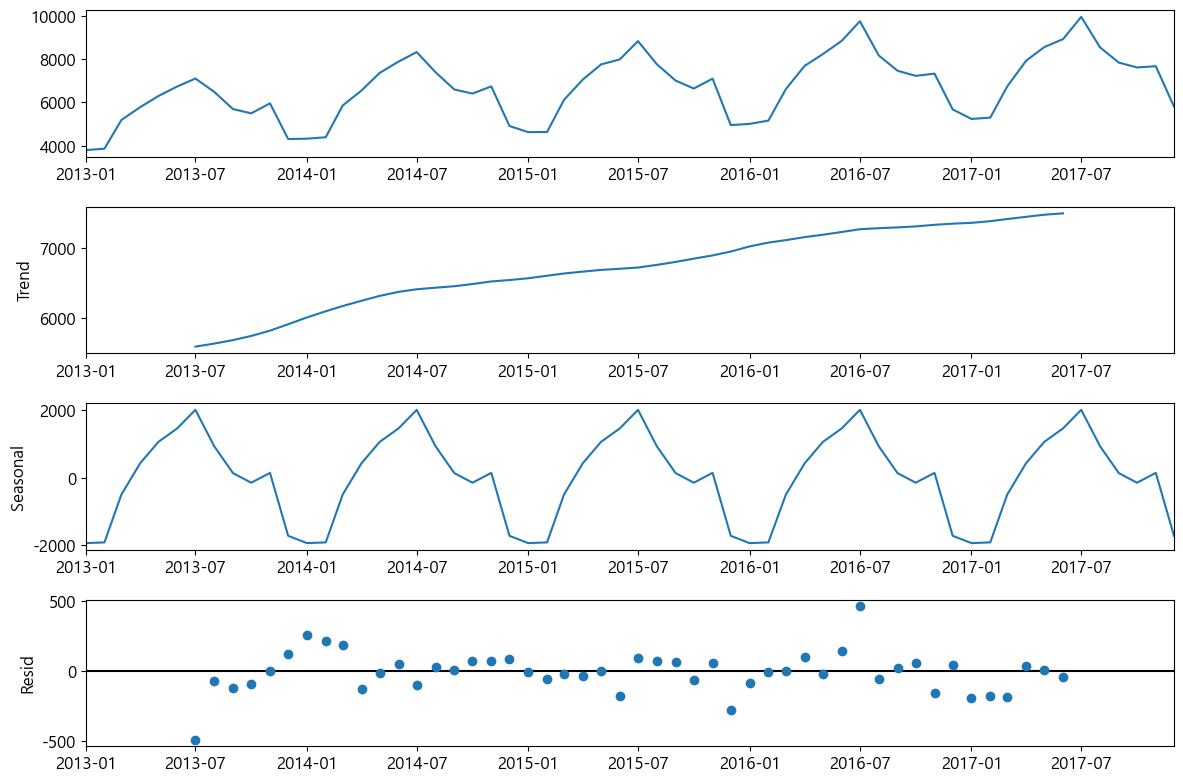

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]
result = seasonal_decompose(data, model = 'additive')
result.plot()
plt.show()

### 8.3 정상성 검정 및 확인

#### 8.3.1 정상성이란?
+ 정상성은 추세와 계졀성을 갖지 않는 진동하는 데이터
+ 주기성 행동을 가지고 있지만 주기가 특정 패턴을 갖지 않고 시계열을 관측하는 어떠한 시점에서도 똑같은 모양일 것이다.
+ 그러므로 추세나 계절성이 없는 데이터 -> ARIMA 모형을 적용하기 위한 조건
+ 정상성을 띄지 않는다면 정상성을 갖춘 형태로 변경해줘야 함

#### 8.3.2 정상성 검정
Augmented Dickey-Fuller Test
+ 정상성을 알아보기 위한 단위근 검정 방법
+ 귀무가설 : 데이터가 정상성을 갖지 않는다.
+ 대립가설 : 데이터가 정상성을 갖는다.
> adfuller(x, maxlag, regression, autolag)
+ x : 시계열 자료
+ regression : 검정에 사용할 모형
  + {'nc': 추세 없음, 'c':상수항만 사용, 'ct':상수항&1차 추세, 'ctt':상수항&2차 추세}
+ autolag : 검정 AR 모형의 차수를 자동 결정하는 알고리즘
  + {'AIC', 'BIC', 't-stat', None}

return 값
0. 검정 통계량
1. p-value
2. 사용된 시차의 수
3. 분석에 사용한 자료 수
4. 1%, 5%, 10% 수준에 해당하는 검정 통계량

In [21]:
data.head()

,price
day,
2013-01-01,3794
2013-02-01,3863
2013-03-01,5190
2013-04-01,5783
2013-05-01,6298


In [26]:
# 훈련, 테스트 셋 8:2로 분리
train_len = int(len(data) * 0.8)
train = data[:train_len]
test = data[train_len:]

In [27]:
train.shape, test.shape

((48, 1), (12, 1))

In [59]:
# Augmented Dickey-Fuller Test - 단위근 검정
# H0 : 시계열 자료가 정상 시계열이 아니다.
# H1 : 시계열 자료가 정상성을 만족한다.

# KPSS 검정
# H0 : 시계열 자료가 정상성을 만족한다.
# H1 : 시계열 자료가 정상 시계열이 아니다.

from statsmodels.tsa.stattools import adfuller, kpss

adf = adfuller(train, regression = 'ct') # 이거 ct는 뭘 보고 설정하는지?

print('adf 검정통계량 :', adf[0])
print('adf p-value :', adf[1])

# KPSS = kpss(train, regression= 'ct')
# print('kpss 검정통계량 :', KPSS[0])
# print('kpss p-value :', KPSS[1])

adf 검정통계량 : -1.999719934132788
adf p-value : 0.6015863303794134


단위근 검정에서 p-value 가 0.05보다 크므로 귀무가설을 기각하지 않음. 즉 정상성을 깆지 않는다.

__차분 후 단위근 검정 재실시__

차분 : 비정상성을 정상성으로 만들기 위해 관측값들의 차이를 계산하는 것

#### 8.3.3 시계열 데이터 정상성 만족시키기
데이터프레임을 n차 차분하고, acf, pacf를 다시 구함
> DF.diff(periods = 차분횟수).iloc[1:]

alpha : 신뢰구간(파란색 구간의 폭으로 나타남)  
lags : 그래프의 X축 범위


In [31]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

diff_data = train.diff(1)
diff_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2013-01-01 to 2016-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   47 non-null     float64
dtypes: float64(1)
memory usage: 768.0 bytes


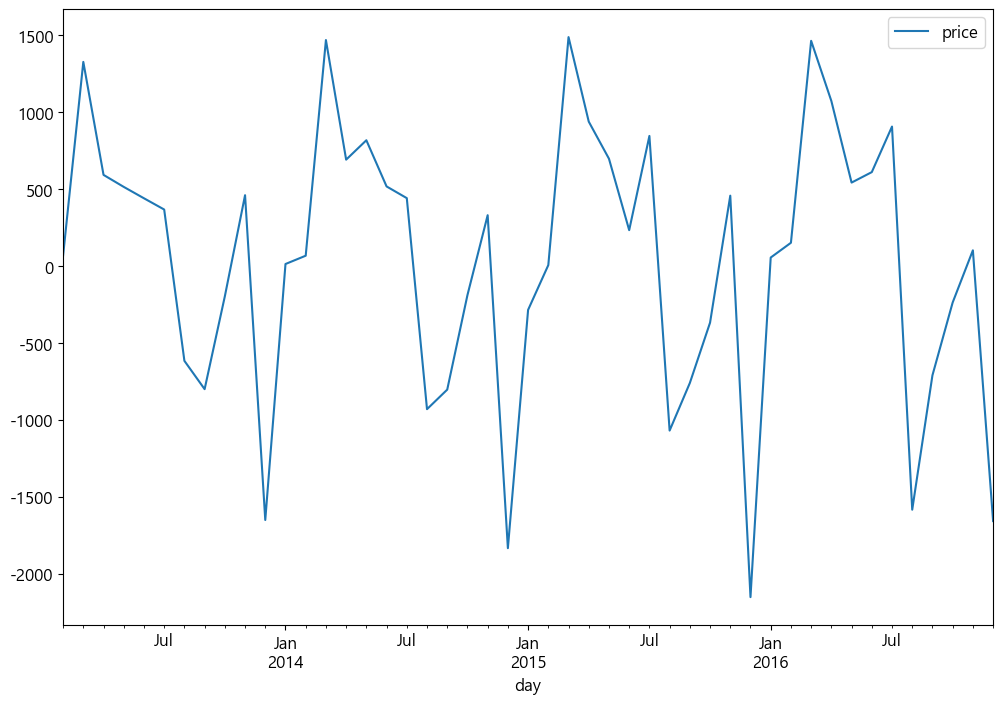

In [44]:
diff_data = diff_data.dropna()
diff_data.plot()
plt.show()

In [45]:
from statsmodels.tsa.stattools import adfuller

adf = adfuller(diff_data)

print('adf statistic :', adf[0])
print('adf p-value :', adf[1])

adf statistic : -12.094547576926388
adf p-value : 2.0851606399614422e-22


#### 8.3.4 [plot] ARIMA(p, d, q) 의 파라미터 정하기
ACF plot 와 PACF plot 을 통해 AR, MA의 모수를 추정함
+ ACF : Lag 에 따른 관측치들 사이의 관련성을 측정하는 함수
+ PACF : k 이외의 모든 다른 시점 관측치의 영향력을 배제한 후의 두 관측치의 관련성을 측정하는 함

<br/>

|요약 : AR/MA 모형과 ACF/PCAF 관계 ||  |
|------|---|---|
||  AR(p)  |  MA(q) |
|ACF |점차적으로 감소| 시차q 이후에 0   |
|PACF |시차 p 이후에 0 | 점차적으로 감소 |


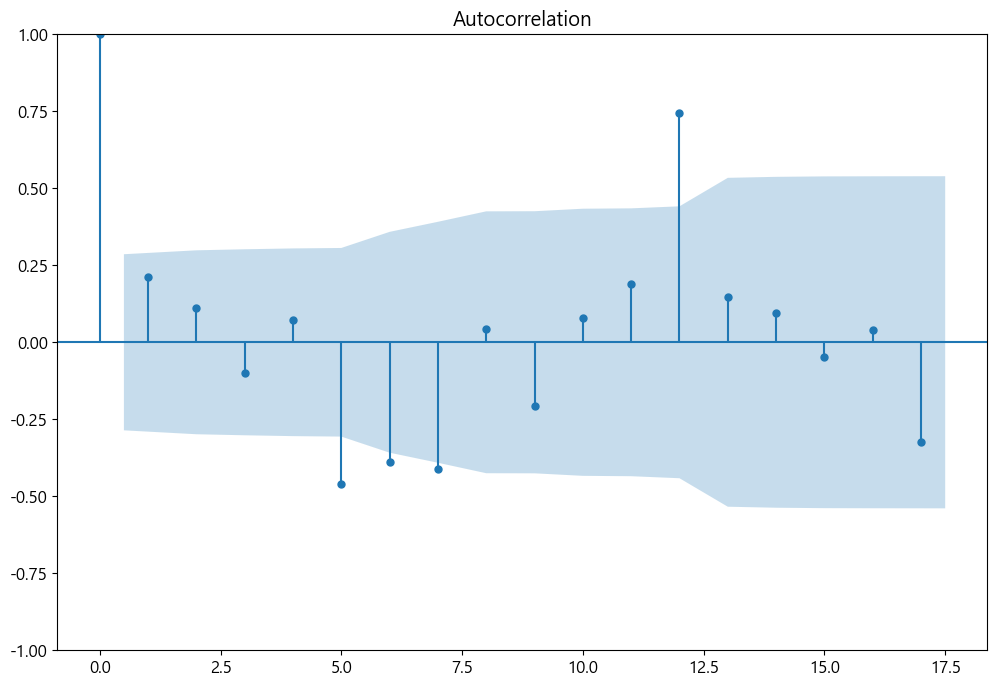

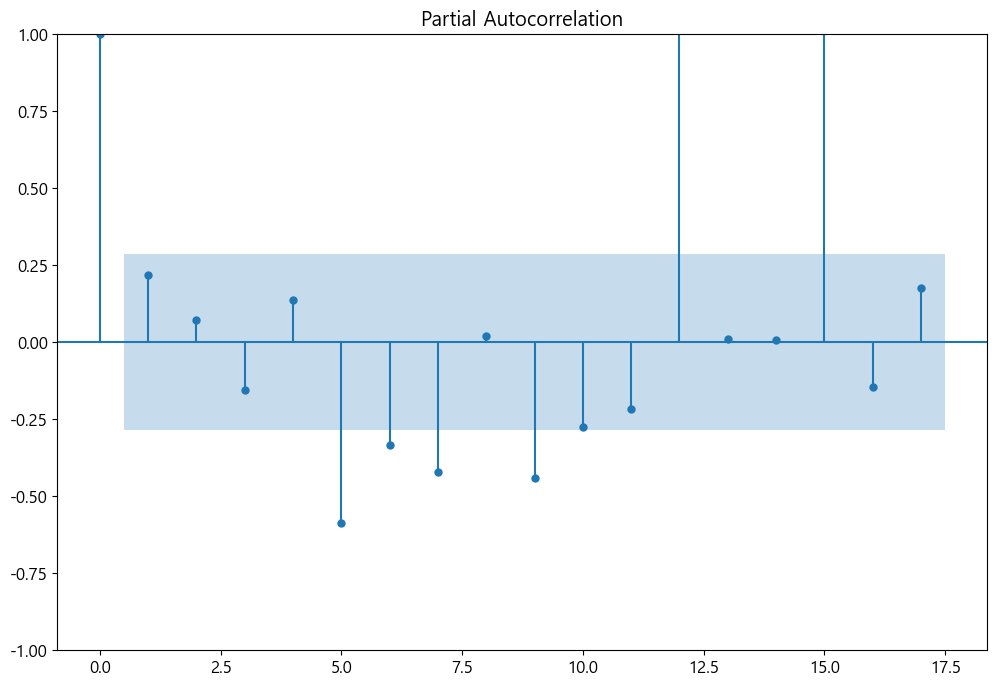

In [60]:
plot_acf(diff_data)
plot_pacf(diff_data)
plt.show()

acf, pacf 모두 2에서 절단점을 가짐

### 8.4 Arima 분석


ARIMA : Autoregressvie integrated MovingAverage  
과거의 데이터를 사용하는 것을 넘어 과거의 데이터가 지니고 있던 추세까지 반영함

AR(자기상관) : 이전의 값이 이후의 값에 영향을 미치고 있는 상황  
MA(이동평균) : 랜덤 변수의 평균값이 지속적으로 증가하거나 감소하는 추세  
차분 : 비정상성을 정상성으로 만들기 위해, 관측값들의 차이를 계산

In [61]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/phong0104/Alex_Lee_SNU_EduTech/9e65152ae7b230d9c940d03dbdc9e468f69cf426/Certificate/(2)%20%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D%20%EC%A0%84%EB%AC%B8%EA%B0%80%20%EC%8B%A4%EA%B8%B0/Ver.2/arima_data.csv', names = ['day','price'])
data['day'] = pd.to_datetime(data['day'], format = '%Y-%m-%d')
data.set_index('day', inplace = True)
data.head()

,price
day,
2013-01-01,3794
2013-02-01,3863
2013-03-01,5190
2013-04-01,5783
2013-05-01,6298


In [62]:
# train, test 분리 8:2
len = data.shape[0]
train = data.iloc[:int(len*0.8)]
test = data.iloc[int(len*0.8):]

#### 8.4.1 [plot] 시계열 데이터 확인하기

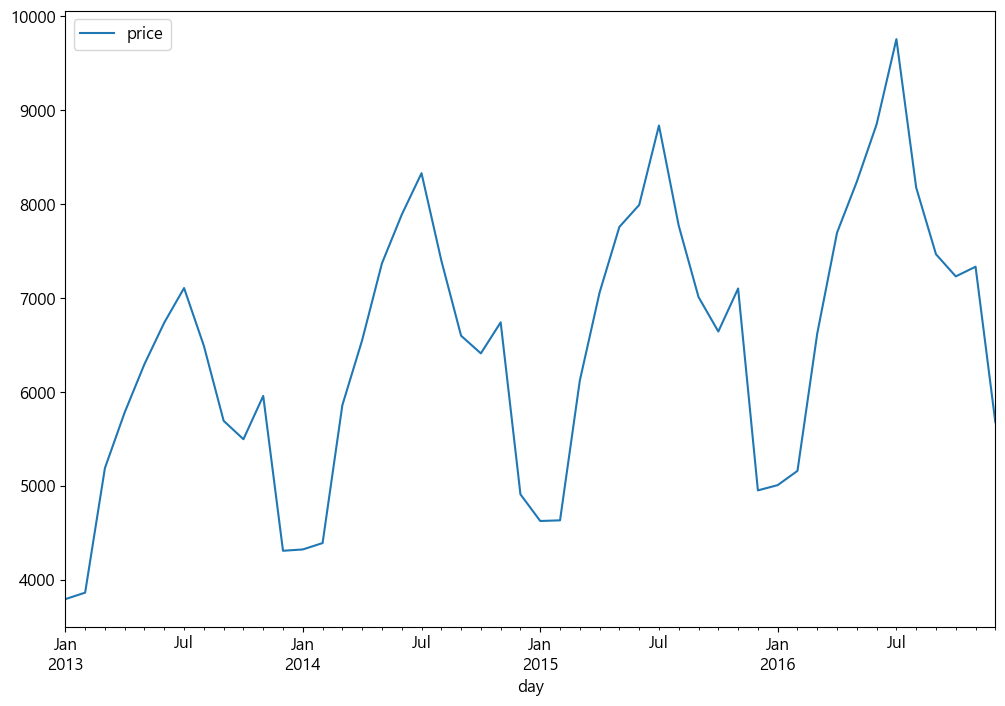

In [64]:
train.plot()
plt.show()

In [66]:
from statsmodels.tsa.stattools import adfuller

adf = adfuller(train, regression = 'ct')

print(adf[0]) # 검정통계량
print(adf[1]) # p-value

-1.999719934132788
0.6015863303794134


p값이 0.05보다 크므로 정상성을 만족하지 않음  
차분하여 다시 확인하자

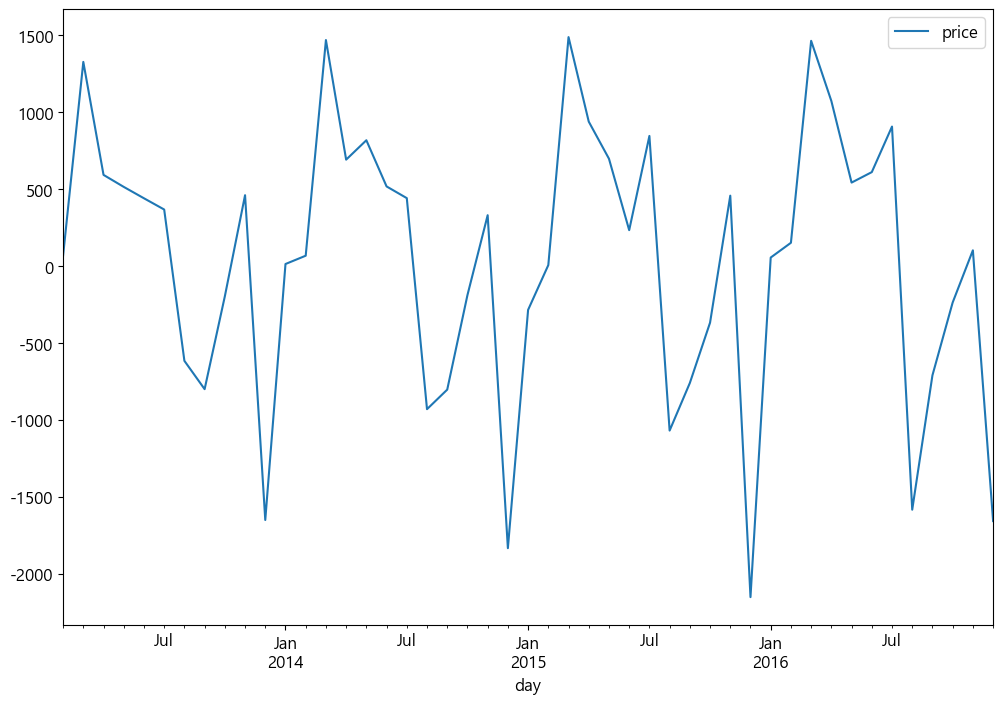

-13.318152920970405
5.55662104349592e-21


In [69]:
diff_data = train.diff(1)
diff_data.dropna(inplace = True)

diff_data.plot()
plt.show()

adf = adfuller(diff_data, regression = 'ct')

print(adf[0]) # 검정통계량
print(adf[1]) # p-value

1차 차분한 데이터의 p-value 가 0.05보다 작으므로 정상성을 만족함

arima 모형의 AR, MA 모수 추정하자

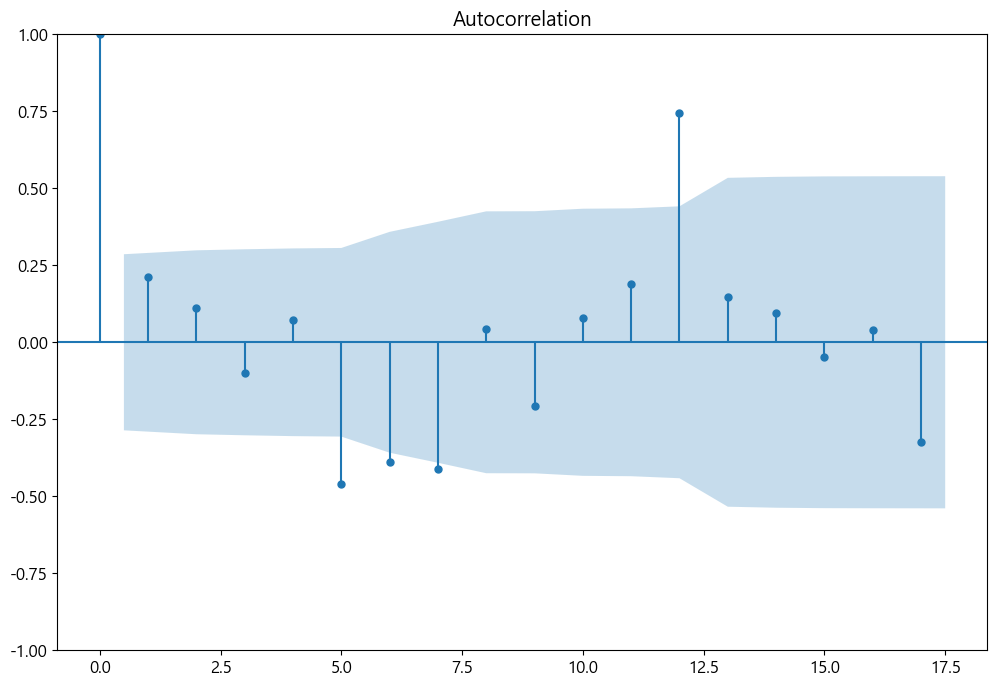

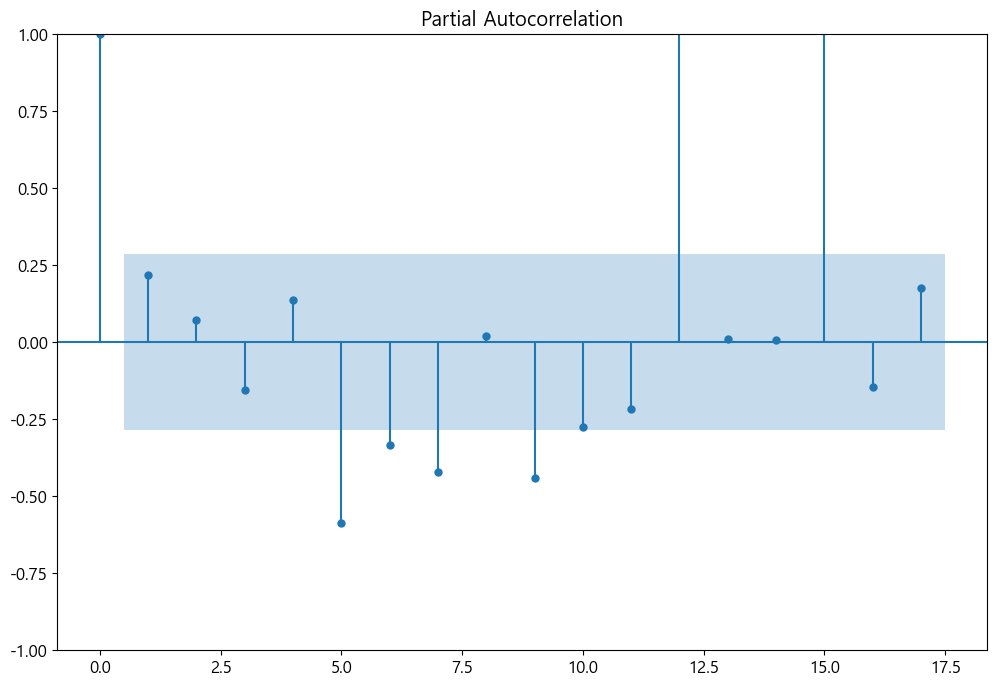

In [70]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(diff_data)
plot_pacf(diff_data)

plt.show()

AR, MA 모두 lag = 2 에서 절단점을 갖는다.

#### 8.4.2 모형 만들기(ARIMA)

> ARIMA(...)

* endog (array_like, optional) : 시계열 y 값<br>
* exog (array_like, optional) : 시계열 이외의 다른 변수 X들<br>
* order ((p,d,q), optional) : 각각 AR, diff, and MA 값 (acf, pacf 그래프 확인 후 설정)<br>
* dates (array_like, optional) : datetime 객체의 배열과 유사한 객체로, pandas 객체가 endog 또는 exog에 제공되면 DateIndex가 있는 것으로 간주
* freq (('B', 'D', 'W', 'M', 'A', 'Q'), optional) : 시계열의 빈도. 날짜가 제공되는 경우 선택 사항

> ARIMA().fit(...)

Kalman 필터를 통해 정확한 최대 가능성으로 ARIMA (p, d, q) 모델을 맞춤

* transparams (bool, optional) : 정상성 보장을 위해 매개변수를 변환할지 여부<br>
* method ({'css-mle','mle','css'}, optional) : 최대화할 로그 가능성으로 start_params 를 시작 매개 변수로 사용
* trend ({'c','nc'}, optional) : 상수 포함 여부로 'c'는 상수를 포함하고 'nc'는 상수가 없음

In [71]:
train.price.values

array([3794, 3863, 5190, 5783, 6298, 6739, 7107, 6492, 5693, 5497, 5958,
       4309, 4323, 4391, 5860, 6552, 7370, 7888, 8330, 7401, 6599, 6411,
       6742, 4910, 4626, 4633, 6121, 7060, 7758, 7992, 8838, 7770, 7011,
       6644, 7102, 4952, 5008, 5160, 6624, 7697, 8240, 8851, 9758, 8176,
       7467, 7231, 7334, 5678], dtype=int64)

In [75]:
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
model = ARIMA(train.price.values, order = (2,1,2), trend = 't')
result = model.fit()
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   48
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -375.863
Date:                Tue, 17 Oct 2023   AIC                            763.725
Time:                        10:30:55   BIC                            774.826
Sample:                             0   HQIC                           767.902
                                 - 48                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            36.9627    173.299      0.213      0.831    -302.697     376.623
ar.L1         -1.3084      0.232     -5.638      0.000      -1.763      -0.854
ar.L2         -0.3109      0.233     -1.336      0.1

In [76]:
sm.__version__

'0.13.5'

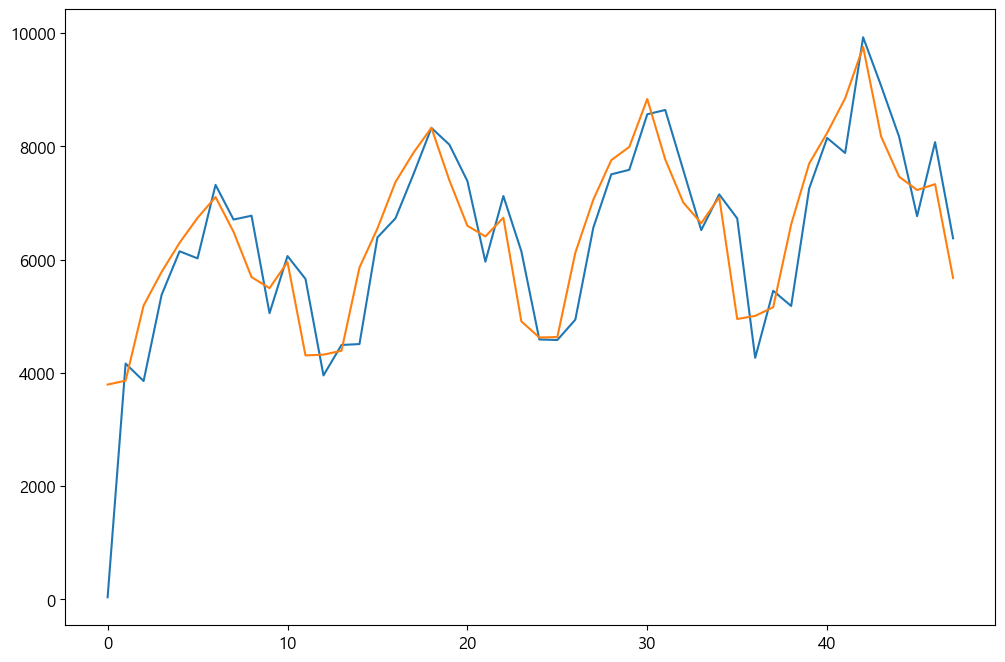

In [78]:
plt.plot(result.predict())
plt.plot(train.price.values)

In [79]:
test

,price
day,
2017-01-01,5236
2017-02-01,5299
2017-03-01,6744
2017-04-01,7927
2017-05-01,8561
2017-06-01,8930
2017-07-01,9960
2017-08-01,8548
2017-09-01,7843


In [80]:
forecast_data = result.forecast(steps = test.shape[0], alpha = 0.1)
forecast_data

array([5847.80951273, 5567.82000118, 5978.19430914, 5625.10817425,
       6056.33590306, 5698.68930474, 6129.40101602, 5773.84739248,
       6201.98100093, 5849.14998136, 6274.5227361 , 5924.45769381])

In [81]:
y_test = test.values
y_test

array([[5236],
       [5299],
       [6744],
       [7927],
       [8561],
       [8930],
       [9960],
       [8548],
       [7843],
       [7620],
       [7676],
       [5809]], dtype=int64)

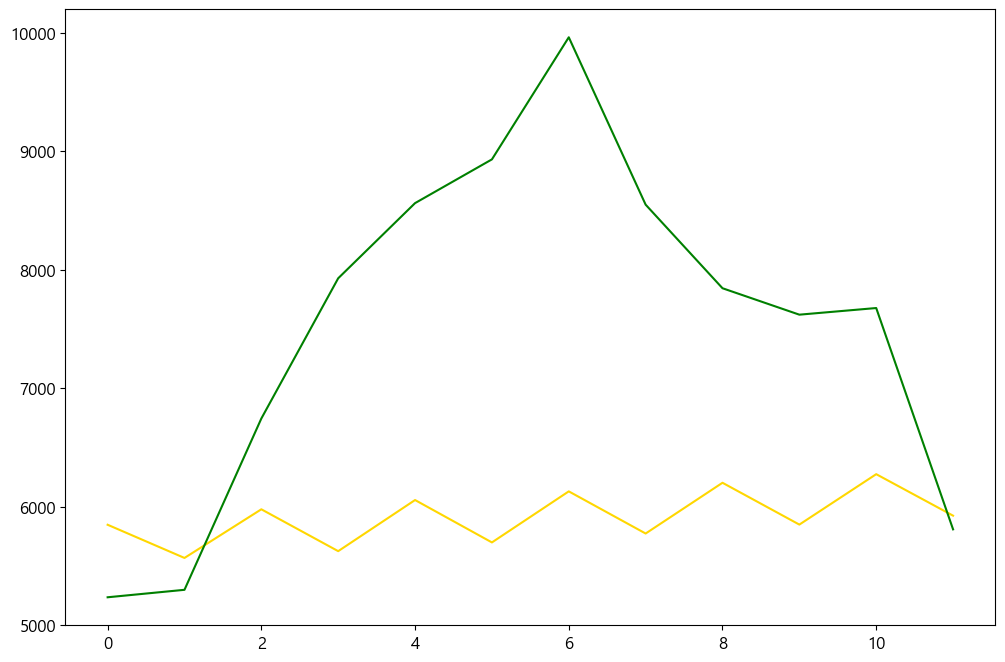

In [82]:
plt.plot(forecast_data, color = 'gold')
plt.plot(y_test, color = 'green')
plt.show()

In [83]:
from sklearn.metrics import r2_score, mean_squared_error
r2_score(y_test, forecast_data)

-1.2115973581695298

In [84]:
import numpy as np
np.sqrt(mean_squared_error(y_test, forecast_data))

2105.9871767641043

### 8.5 계절성 시계열 데이터에 대한 분석 : SARIMA
SARIMA : 데이터가 지닌 계절성(주기에 따라 유사한 양상으로 변화하는 모양)까지 고려한 ARIMA 모델

In [101]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('https://raw.githubusercontent.com/phong0104/Alex_Lee_SNU_EduTech/9e65152ae7b230d9c940d03dbdc9e468f69cf426/Certificate/(2)%20%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D%20%EC%A0%84%EB%AC%B8%EA%B0%80%20%EC%8B%A4%EA%B8%B0/Ver.2/arima_data.csv', names = ['day','price'])
data['day'] = pd.to_datetime(data['day'], format = '%Y-%m-%d')
data.set_index('day', inplace = True)
data.head()

,price
day,
2013-01-01,3794
2013-02-01,3863
2013-03-01,5190
2013-04-01,5783
2013-05-01,6298


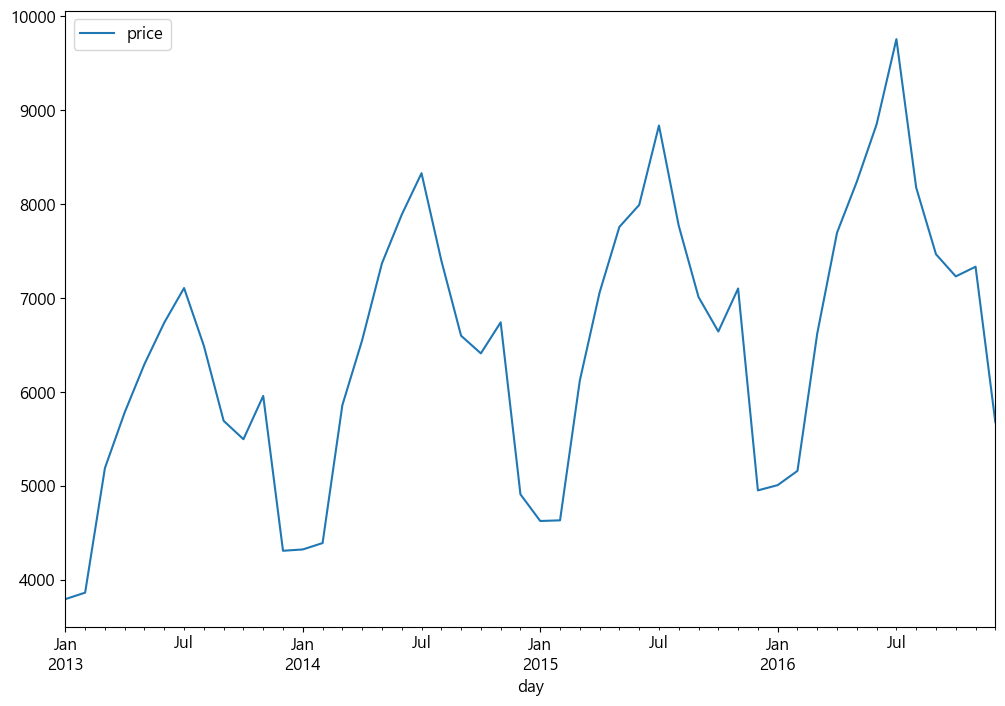

In [102]:
train_len = int(data.shape[0] * 0.8)
train = data.iloc[:train_len]
test = data.iloc[train_len:]

train.plot()
plt.show()


>SARIMAX(endog, order = (1,1,1), seasonal_order = (1,1,1,12),  
        enforce_stationarity = False, enforce_invertibility = False)

+ endog : 시계열 y 값
+ order (p,d,q) : 각각 AR, diff, MA 값
+ seasonal_order (P,D,Q,s) : s는 계절의 기간 수를 제공하는 정수
+ trend ('n', 'c', 't', 'ct') : n 은 없음, c는 상수, t는 선형추세, ct 는 둘다

In [103]:
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train.price.values, order = (2,1,2),
                seasonal_order=(1,1,1,12), trend = 'ct',
                enforce_invertibility= False,
                enforce_stationarity=False)

result = model.fit()
print(result.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                   48
Model:             SARIMAX(2, 1, 2)x(1, 1, [1], 12)   Log Likelihood                -133.596
Date:                              Tue, 17 Oct 2023   AIC                            285.192
Time:                                      11:45:36   BIC                            294.154
Sample:                                           0   HQIC                           286.942
                                               - 48                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   -175.0139   1028.822     -0.170      0.865   -2191.469    1841.441
drift          5.60

#### 8.5.2 데이터 확인
1. 시간 경과에 따른 표준화 잔차
2. 히스토그램과 표준화된 잔차의 추정된 밀도, 참조를 위해 그려진 Normal (0,1) 밀도
3. 일반 기준선이 있는 일반 QQ 플롯
4. 상관도

In [104]:
result.plot_diagnostics()

ValueError: Length of endogenous variable must be larger the the number of lags used in the model and the number of observations burned in the log-likelihood calculation.

<Figure size 1200x800 with 0 Axes>

#### 8.5.3 예측값, mse, 신뢰구간의 최소&최댓값

In [105]:
forecast_values = result.get_forecast(steps = int(test.shape[0]))
forecast_values.summary_frame()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,5495.403480,188.080221,5126.773020,5864.033939
1,5512.069205,228.665248,5063.893554,5960.244855
2,7257.349855,290.528107,6687.925229,7826.774482
3,8177.986368,336.512171,7518.434633,8837.538103
4,8634.866470,360.889319,7927.536402,9342.196537
5,9426.877733,406.382751,8630.382177,10223.373289
6,10152.920088,436.502715,9297.390488,11008.449688
7,8737.475500,456.869913,7842.026924,9632.924076
8,8255.737733,495.659505,7284.262954,9227.212512
9,7709.787465,517.372775,6695.755460,8723.819470


#### 8.5.4 예측값을 그리는 함수

In [106]:
forecast_values.conf_int()

array([[ 5126.77302034,  5864.03393889],
       [ 5063.89355371,  5960.24485537],
       [ 6687.92522858,  7826.77448234],
       [ 7518.43463343,  8837.53810295],
       [ 7927.53640216,  9342.19653684],
       [ 8630.38217659, 10223.37328924],
       [ 9297.39048763, 11008.44968758],
       [ 7842.02692437,  9632.92407595],
       [ 7284.26295372,  9227.21251151],
       [ 6695.75545972,  8723.81946981],
       [ 7020.54724659,  9124.33626702],
       [ 5384.38378036,  7623.29215294]])

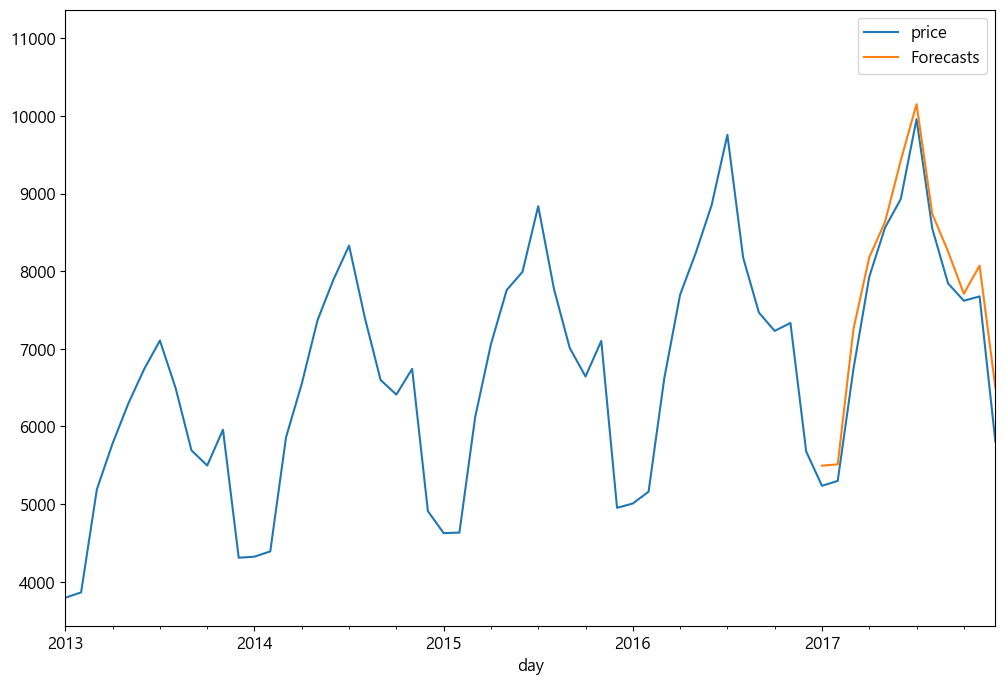

In [107]:
ax = data.plot()

pred_ci = pd.DataFrame(forecast_values.conf_int(), index = list(test.index))

ax.fill_between(pred_ci.index,
               pred_ci.iloc[:, 0],
               pred_ci.iloc[:, 1],
               color = 'red', alpha = 0.5)

predicted = pd.DataFrame(forecast_values.predicted_mean, index = list(test.index), columns= ['Forecasts'])
predicted.plot(ax = ax, label = 'Forecasts')

plt.legend()
plt.show()

In [108]:
r2_score(predicted, test)

0.930269954423748

### 8.6 auto arima
자동으로 sarima 분석을 수행할 수 있다.

In [110]:
data.head()

,price
day,
2013-01-01,3794
2013-02-01,3863
2013-03-01,5190
2013-04-01,5783
2013-05-01,6298


In [ ]:
# !pip install pmdarima

In [113]:
from pmdarima import auto_arima

auto_model = auto_arima(train, start_P =1, D =1, Q=1, max_P = 5, max_D = 5, max_Q= 5, m =12,
                        seasonal = True, information_criterion = 'aic', trace = True, stepwise = True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=500.900, Time=0.49 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=513.245, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=496.519, Time=0.05 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=500.500, Time=0.14 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=569.050, Time=0.01 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=495.874, Time=0.06 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=496.035, Time=0.14 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=498.479, Time=0.07 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=497.831, Time=0.07 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=497.839, Time=0.08 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=501.105, Time=0.03 sec
 ARIMA(2,0,1)(0,1,0)[12] intercept   : AIC=499.873, Time=0.09 sec
 ARIMA(1,0,0)(0,1,0)[12]             : AIC=510.570, Time=0.02 sec

Best model:  ARIMA(1,0,0)(0,1,0)[12] intercept
Total fit time: 1.292 seconds


In [114]:
print(auto_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                   48
Model:             SARIMAX(1, 0, 0)x(0, 1, 0, 12)   Log Likelihood                -244.937
Date:                            Tue, 17 Oct 2023   AIC                            495.874
Time:                                    11:48:41   BIC                            500.625
Sample:                                01-01-2013   HQIC                           497.532
                                     - 12-01-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    239.6145     71.574      3.348      0.001      99.331     379.898
ar.L1          0.5607      0.093   

각 요소의 P-value 와 AIC 확인

In [115]:
auto_model.predict(n_periods = int(test.shape[0]))

2017-01-01     5654.662125
2017-02-01     5762.179632
2017-03-01     7201.239562
2017-04-01     8260.256373
2017-05-01     8795.416397
2017-06-01     9402.020745
2017-07-01    10306.556227
2017-08-01     8723.174442
2017-09-01     8013.399715
2017-10-01     7776.965347
2017-11-01     7879.721810
2017-12-01     6223.585265
Freq: MS, dtype: float64

In [117]:
# 학습 데이터셋으로부터 test 길이만큼 예측
prediction = pd.DataFrame(auto_model.predict(n_periods = int(test.shape[0])),
                          index = test.index, columns = ['pred_price'])
prediction

,pred_price
day,
2017-01-01,5654.662125
2017-02-01,5762.179632
2017-03-01,7201.239562
2017-04-01,8260.256373
2017-05-01,8795.416397
2017-06-01,9402.020745
2017-07-01,10306.556227
2017-08-01,8723.174442
2017-09-01,8013.399715


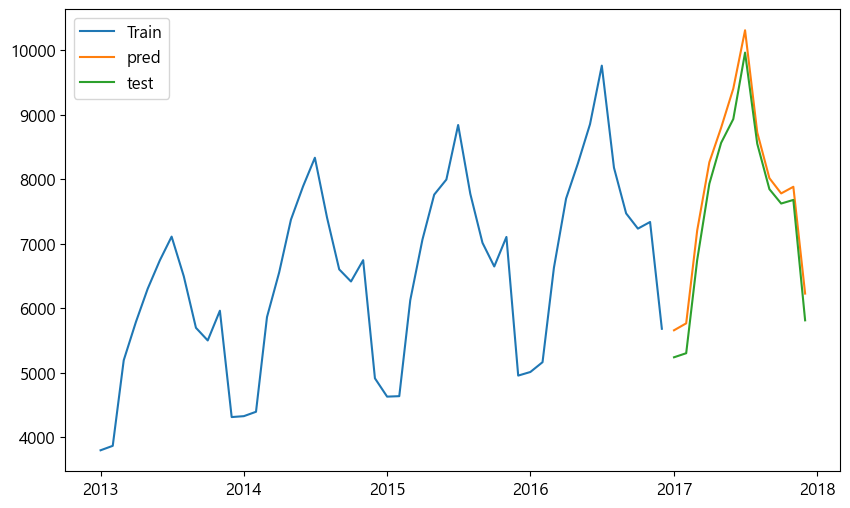

In [118]:
plt.figure(figsize = (10,6))
plt.plot(train, label = 'Train')
plt.plot(prediction, label = 'pred')
plt.plot(test, label = 'test')

plt.legend(loc = 'upper left')
plt.show()

In [119]:
test['pred_price'] = prediction
r2_score(test.price, test.pred_price)

0.9415940851291925

In [120]:
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(test.price, test.pred_price) # mse
print(mse)
print(np.sqrt(mse))

117128.40075132373
342.24026757721504


### 8.6 결과 해석
1. 시계열 데이터 분석한 결과 1년 주기의 계절성을 가지고 있음을 확인할 수 있었다.
2. 또한 우상향하는 추세가 있음을 알 수 있었다.
3. 추세를 가지고 있으므로 1차 차분을 해줘야 한다.
+ 계절성을 가지고 있으므로 예측 모형은 SARIMA를 사용하였다.
+ 최적의 매개변수를 갖는 SARIMAX(1, 0, 0)x(0, 1, 0, 12) 모델의 설명력은 94.1%로 예측의 정확도가 매우 높았다.
+ 예측값과 실제값의 차이는 평균적으로 342 정도 난다고 할 수 있다.